### IDs:
Insert yours IDs to the cell below

ID #1: 203972922

ID #2: 201312907


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

## imports 

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from scipy import stats
from sklearn import mixture
from sklearn.datasets import load_boston
import scipy.stats
import numpy as np
import numpy.random
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from scipy import stats
from sklearn import mixture
from sklearn.datasets import load_boston
from sklearn import mixture
import scipy

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [5]:
boston = load_boston()

X = boston.data
columns = list(boston.feature_names)
y = boston.target
boston_df = pd.DataFrame(np.concatenate((X, y[:, np.newaxis]), axis=1), \
                         columns= columns + ['PRICE'])
print(boston_df[0:10].to_markdown())

|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |   PRICE |
|---:|--------:|-----:|--------:|-------:|------:|------:|------:|-------:|------:|------:|----------:|-------:|--------:|--------:|
|  0 | 0.00632 | 18   |    2.31 |      0 | 0.538 | 6.575 |  65.2 | 4.09   |     1 |   296 |      15.3 | 396.9  |    4.98 |    24   |
|  1 | 0.02731 |  0   |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 | 396.9  |    9.14 |    21.6 |
|  2 | 0.02729 |  0   |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |    34.7 |
|  3 | 0.03237 |  0   |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |    33.4 |
|  4 | 0.06905 |  0   |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 6.0622 |     3 |   222 |      18.7 | 396.9  |    5.33 |    36.2 |
|  5 | 0.02985 |  0   |    2.18 |      0 | 0.458 | 6.43  |  58.7 | 6.

In [6]:
#1. describe the dataset. How many samples does it contain? 
#   How many features? What isis the data type for each variable?

amount_of_feature = boston_df.shape[1]-1
amount_of_sampels = boston_df.shape[0]
print('The amount of sampels is: ' + str(amount_of_sampels))
print('The amount of feature is: ' + str(amount_of_feature))
print('data type for each feature:')
boston_df.info(verbose=True)


The amount of sampels is: 506
The amount of feature is: 13
data type for each feature:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


0.538

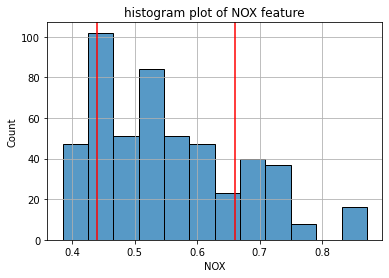

In [25]:

#2. Produce a histogram and a boxplot of the nitric oxides concentration. 
#   describe the distribution.
boston_df_col = boston_df.columns.to_numpy()

plt.figure()
ax = sns.histplot(x="NOX", data=boston_df)
plt.title('histogram plot of NOX feature')
plt.grid()
NOX_feature = boston_df['NOX'].to_list()
plt.axvline(x = 0.44, color= 'r')
plt.axvline(x = 0.66, color= 'r')

np.mean(NOX_feature)
np.std(NOX_feature)
np.median(NOX_feature)



we can see from the histogram plot that most of the data in the range 
of [mean-std,mean+std]
in our case the mean is 0.55 and the std is 0.11 -> [0.44,0.66]


* the box plot show the precentiles:
    1. the first line describe the 0% percentile (the min value)
    2. the secound line describe the 25% percentile (Q1)
    3. the third line describe the 50% percentile (median) 
    4. the forth line describe the 75% percentile (Q3) 
    5. the fivth line describe the 100% percentile (the max value) 
from our box plot we can infer that the IQR(inter quartile range) is
between ~0.44 to ~0.66 which correlate with the histogram conclution 

Text(0.5, 1.0, 'box plot of NOX feature')

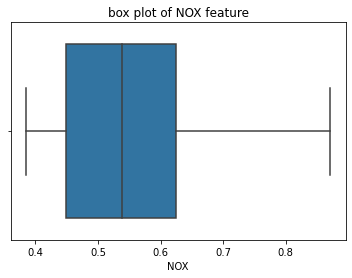

In [26]:
plt.figure()
ax = sns.boxplot(x="NOX", data=boston_df)
plt.title('box plot of NOX feature')

In [27]:
#3. Produce a correlation matrix of all the features. 
#   [Are there any correlated features?

corr_array = boston_df.corr().to_numpy()
np.fill_diagonal(corr_array, 0)
max_corr_row_col = np.where(corr_array == np.max(corr_array))[0]
min_corr_row_col = np.where(corr_array == np.min(corr_array))[0]
min_cor_features = boston_df_col[min_corr_row_col].tolist()
max_cor_features = boston_df_col[max_corr_row_col].tolist()

the maximum correlation is between each feature with himself in the digonal
The min corroletion found to be betwenn feature NOX to feature DIS
The max corroletion found to be betwenn feature RAD to feature TAX
The unusual feature is the CHAS, it can be seen from the heat map,that he has no correlation with other features


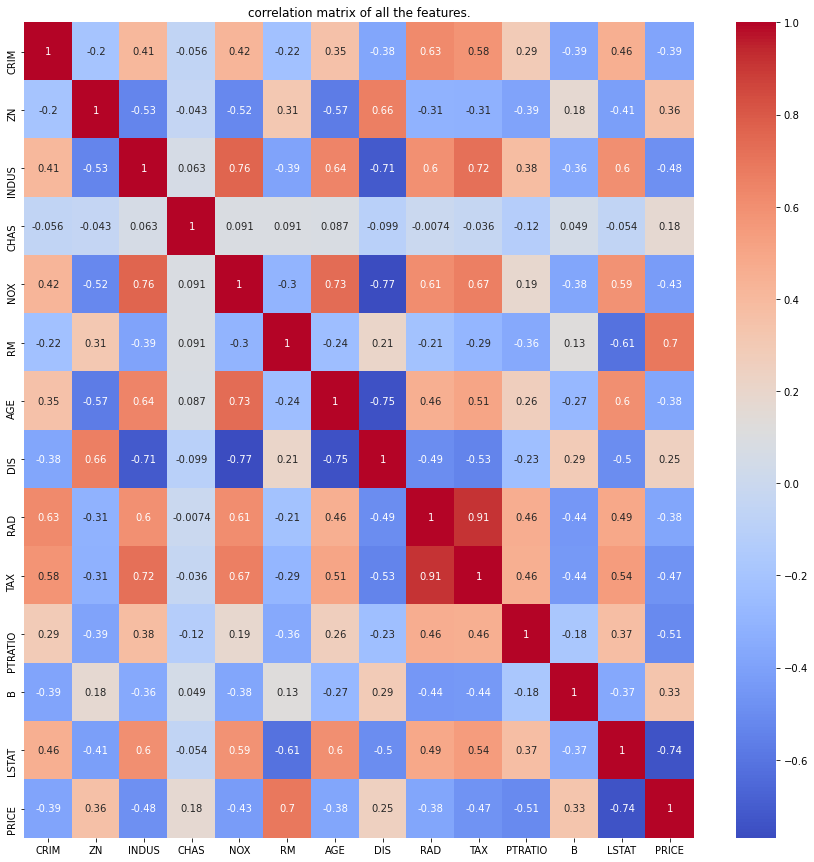

In [33]:

plt.figure(figsize=(15, 15))
sns.heatmap(boston_df.corr(),cmap='coolwarm',annot = True )
plt.title('correlation matrix of all the features.')

string = 'the maximum correlation is between each feature with himself in the digonal'
print(string)
string = 'The min corroletion found to be betwenn feature ' + min_cor_features[0] + ' to feature ' \
+ min_cor_features[1]
print(string)

string = 'The max corroletion found to be betwenn feature ' + max_cor_features[0] + ' to feature ' \
+ max_cor_features[1]
print(string)

string = 'The unusual feature is the CHAS, it can be seen from the heat map,' + \
        'that he has no correlation with other features'
print(string)

Text(0.5, 0.98, 'Joint plot between NOX, DIS')

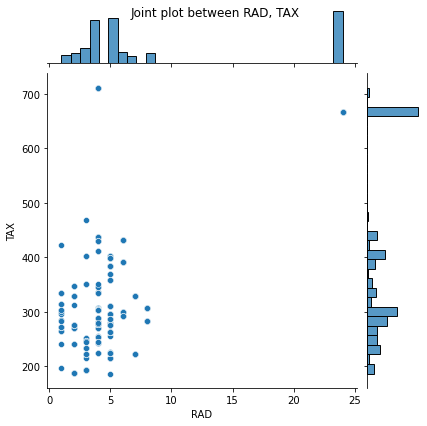

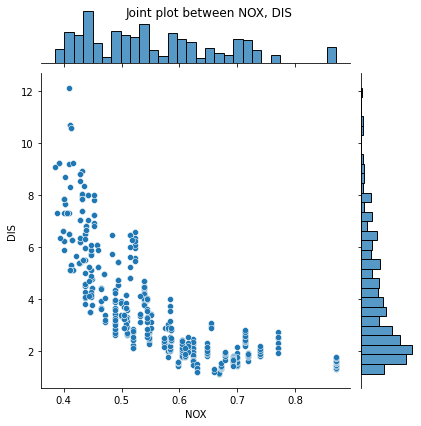

In [34]:
#4. Select the 2 pairs of features with the highest correlation
# (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 



ax= sns.jointplot(x=boston_df[max_cor_features[0]], y=boston_df[max_cor_features[1]],\
              marginal_kws=dict(bins=30))
ax.fig.suptitle('Joint plot between ' + max_cor_features[0]+ ', '+ max_cor_features[1])

ax= sns.jointplot(x=boston_df[min_cor_features[0]], y=boston_df[min_cor_features[1]],\
              marginal_kws=dict(bins=30))
ax.fig.suptitle('Joint plot between ' + min_cor_features[0]+ ', '+ min_cor_features[1])



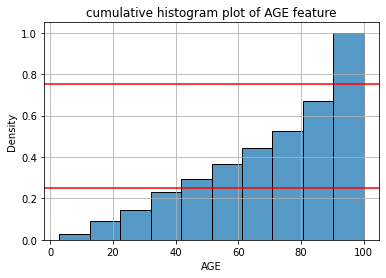

In [79]:

#5. Produce a cumulative histogram of the age variable and 
#   add two horizontal lines on the first and third quartile (on the cumulative count)

plt.figure()
ax = sns.histplot(x="AGE", data=boston_df, cumulative=True, stat='density')
plt.title('cumulative histogram plot of AGE feature')
cumsum = boston_df['AGE'].to_numpy().cumsum()
plt.axhline(y= 0.25, color = 'r')
plt.axhline(y= 0.75, color = 'r')
plt.grid()


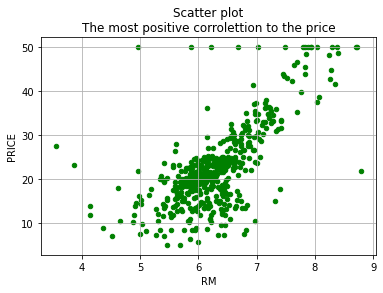

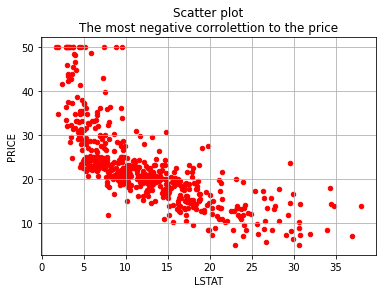

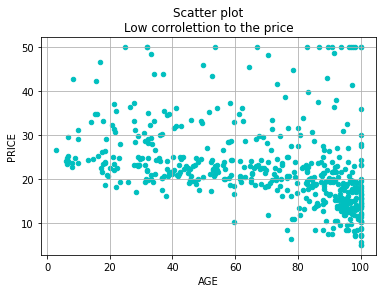

In [7]:
#6. Identify and report 2 “interesting” trends in the data. 
#   No need to provide statistical confidence at this point. 

boston_df.plot.scatter(x='RM', y='PRICE', c = 'g')
plt.title('Scatter plot\nThe most positive corrolettion to the price')
plt.grid()


boston_df.plot.scatter(x='LSTAT', y='PRICE', color = 'r')
plt.title('Scatter plot\nThe most negative corrolettion to the price')
plt.grid()


boston_df.plot.scatter(x='AGE', y='PRICE', color = 'c')
plt.title('Scatter plot\nLow corrolettion to the price')
plt.grid()


#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

* P(x) have n parameters 
* P(y) have m parameters
* P(z) have k parameters
    * $ P(X,Y,Z) = P(X<x, Y<y, Z<z) $
    * genral case - the amount of parameters of joint distribution is  $nmk-1$  
    * in ourcase $2nm-1$
    * the reason for the -1 , is for the reson that pdf must sum to 1

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

* X,Y,Z are iid, therefore each random variable have his amount of parameters
    * X have n-1
    * Y have m-1
    * Z have k-1
* $ P(X,Y,Z) = P(X)P(Y)P(Z) $
* which is in genral case $ n-1+m-1+k-1 $
* in our case  $ n+m-1 $ 

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

* x,y are conditionaly independent to z
    * $ P(X,Y,Z) = P(z)P(y|z)P(x|y,z) = P(z)P(y|z)P(x|z) $

* that mean the amount of parameters is
    * genral case $ k+k(m-1)+k(n-1) $ 
    * in our case $ 2+2(m-1) + 2(n-1)  = 2(m+n-1) $


#### 2.D
Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

* if we will choose Z to be $ Z=X+Y $
    * needed to show that: $  P(X,Y|Z) \neq  P(X|Z)P(Y|Z) $ where $  P(X,Y) =  P(X)P(Y) $ 
    * $ P(X,Y|X+Y)  \neq P(X|X+Y)P(Y|X+Y) $
    * @$ P(X,Y|X+Y) = P(X,Y|X)+ P(X,Y|Y) != P(X|X+Y)P(Y|X+Y) $
        * note that X and Y are iid
    * $ P(X|X)*P(Y|X)+ P(X|Y)*P(Y|Y) != (P(X|X)+P(X|Y))(P(Y|Y)+P(Y|X)) $
    
    
    $P(X,Y|Z) = p(X,Y \int Z)/P(Z)$ 
    $P(X|Z)P(Y|Z) = P(X \int Z)P(Y \int Z)/P^2(Z)$

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

## way 1
* using sklearn implementation of EM

## fill csv path 

In [8]:
csv_path = r"C:\Msc\Git\StatisticsAndDataAnalysis\HW2\GMD_2021.csv"

In [110]:
GMD_csv_df = pd.read_csv(csv_path, header=None, index_col=0)
samples = GMD_csv_df[1].to_list()

#print(df_gmd.head())
mue_1 = 4
mue_2 = 9
sigma_1 = 0.5
sigma_2 = 0.5
sigma_3 = 1.5
weight_2 = 0.25

######## way 1 #####
consticts_not_achieve = True
while consticts_not_achieve:
    mean_init_array = np.array([[mue_1],[mue_2],[np.mean(samples)]])
    weight_init = (0.25,weight_2,0.5)
    ### WAY no' 1 - Using Gaussian mixture with EM ###
    # Fit a Gaussian mixture with EM using 2 components
    gmm = mixture.GaussianMixture(n_components=3, means_init =mean_init_array ,weights_init=weight_init,  covariance_type='full').fit(GMD_csv_df)
    means = np.round(gmm.means_.reshape(3,).tolist(),0)
    weights = np.round( gmm.weights_.tolist(),3)
    if means[0] == mue_1 and means[1]== mue_2 and weights[1]== weight_2:
        consticts_not_achieve = False

print("="*20,"WAY no' 1 using Gaussian mixture with EM","="*20)
GM_result_df = pd.DataFrame()
GM_result_df['Means'] = means
GM_result_df['Weights'] = weights
print(GM_result_df)

==================== WAY no' 1 using Gaussian mixture with EM ====================
   Means  Weights
0    4.0    0.125
1    9.0    0.250
2   15.0    0.625


## way 2
* the this methooweight_2d goal is to maximize the liklihood, therefore we implement grid search our missing parameters
* the parameter that will be choose will be the one who will the highest of all options

In [112]:
new_max= 0
new_parameters = [0,0,0]
max_value = int(np.ceil(np.mean(samples)+np.std(samples)))
min_value = int(np.round(np.mean(samples)-np.std(samples)))
for w1 in np.arange(0.05,0.325,0.05):
    w3 = 1-w1-weight_2
    for mue_3 in range (min_value,max_value):
        curr_list = [w1,w3,mue_3]
        curr_sum = 0
        for i_sample in samples:
            curr_sum += (w1*scipy.stats.norm(mue_1,sigma_1 ).pdf(i_sample)+weight_2*scipy.stats.norm(mue_2,sigma_2 ).pdf(i_sample)+w3*scipy.stats.norm(mue_3,sigma_3 ).pdf(i_sample))
        if new_max < curr_sum:
            new_parameters = curr_list
            new_max  = curr_sum
print("="*20,"WAY no' 2 using grid search to maximize MLE","="*20)
            
List = [[mue_1, new_parameters[0]], [mue_2, weight_2], [new_parameters[2], new_parameters[1]]]
GM_result_df = pd.DataFrame(List, columns = ['Means', 'Weights'])
print(GM_result_df)

==================== WAY no' 2 using grid search to maximize MLE ====================
   Means  Weights
0      4     0.05
1      9     0.25
2     15     0.70


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

C:\Users\or livne\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


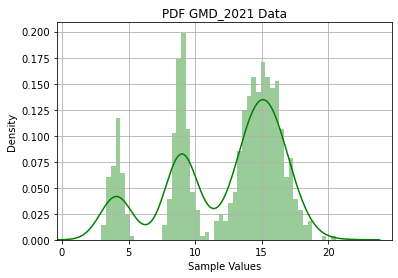

In [46]:
"""
#### 3.B
Plot a graph of the pdf of the distribution you inferred.
 Select adequate limits for the axes for this plot and explain your decision.
"""

sns.distplot(samples,bins=50, color= 'g')
std = np.std(samples)
mean = np.mean(samples)
plt.xlim(xmin= mean-3*std , xmax= mean+3*std)
# The limits are where the cdf is 0.997 by the formula : P(μ-3s ≤ Y ≤ μ+3s) 
plt.grid()
plt.xlabel(f'Sample Values')
plt.title(f'PDF GMD_2021 Data')
plt.show()


In [69]:
"""
#### 3.C
Now assume that the data comes from a Gaussian mixture 
distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways
described in section A? Explain.
"""
# 55

mean_init_array = np.array([[mue_1],[mue_2],[np.mean(samples)],[np.mean(samples)]])
weight_2 = 0.25
weight_init = (0.25,weight_2,0.25,0.25)
### WAY no' 1 - Using Gaussian mixture with EM ###
print("="*20,"WAY no' 1 using Gaussian mixture with EM","="*20)
# Fit a Gaussian mixture with EM using 2 components
gmm = mixture.GaussianMixture(n_components=4,means_init =mean_init_array ,weights_init=weight_init,  covariance_type='full').fit(GMD_csv_df)

GM_result_df = pd.DataFrame()
GM_result_df['Means'] = gmm.means_.reshape(4,).tolist()
GM_result_df['Weights'] =np.round( gmm.weights_.tolist(),3)
print(GM_result_df)

==================== WAY no' 1 using Gaussian mixture with EM ====================
       Means  Weights
0   4.083811    0.125
1   9.000157    0.251
2  12.645883    0.026
3  15.212903    0.599


#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$


* way 1: Like we did in the first question-
    1. create a normal distrubution to each geonosian with size of N
    2. create an empty GMD array
    3. do N times:
        - randomize a P(probability) that considerate the weight of each distrubution
        - add to the GMD array a value from one of the normal distrubution
    
* way 2
    1. Genarate 2 normal distrubution with size of 500
    2. join  the 2 vectors into one which represent the GMD


#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


In [50]:
mue1 = 3
mue2 = 7
mue3 = 10
sigma1 = sigma2 = sigma3 = 1
w1 = w2 = w3 = 0.33

C:\Users\or livne\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


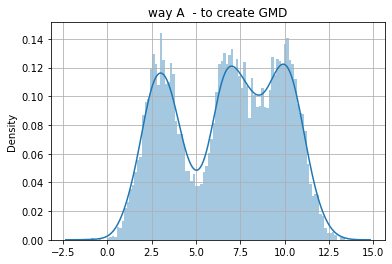

In [70]:
n = 10000
numpy.random.seed(0x5eed)
# Parameters of the mixture components
norm_params = np.array([[mue1, sigma1],
                        [mue2, sigma2],
                        [mue3, sigma3]])
n_components = norm_params.shape[0]
# Weight of each component, in this case all of them are 1/3
weights = np.ones(n_components, dtype=np.float64) / 3.0
# A stream of indices from which to choose the component
mixture_idx = numpy.random.choice(len(weights), size=n, replace=True, p=weights)
# y is the mixture sample
y = numpy.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                   dtype=np.float64)

# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(y.min(), y.max(), 200)
ys = np.zeros_like(xs)

for (l, s), w in zip(norm_params, weights):
    ys += ss.norm.pdf(xs, loc=l, scale=s) * w

sns.distplot(y,bins=100)
plt.title('way A  - to create GMD')
plt.grid()

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

C:\Users\or livne\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


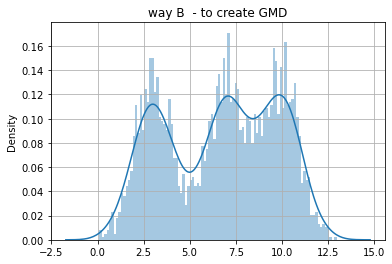

In [71]:
plt.figure()
norm1 = np.random.normal(mue1, sigma1,1000)
norm2 = np.random.normal(mue2, sigma2,1000)
norm3 = np.random.normal(mue3, sigma3,1000)

new_norm2 = []
new_norm2.extend(norm1)
new_norm2.extend(norm2)
new_norm2.extend(norm3)
sns.distplot(new_norm2, bins=100)
plt.title('way B  - to create GMD')
plt.grid()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?
* answer
    * $ P(X<=50k)$ 


In [53]:
mean = 70000
std = 30000
desire_sallary = 50000
less_than_50k = scipy.stats.norm(mean,std).cdf(desire_sallary)
print(less_than_50k)

0.2524925375469229


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

* answer
    * $ P(60k>=X>=45K)P(X<=65k)-P(X<=45k)$ 


In [54]:
up_desire_sallary = 65000
down_desire_sallary = 45000

up_cdf_result = scipy.stats.norm(mean,std).cdf(up_desire_sallary)
down_cdf_result = scipy.stats.norm(mean,std).cdf(down_desire_sallary)

percent_to_sallary_between_2_values = up_cdf_result - down_cdf_result

print(percent_to_sallary_between_2_values)


0.23148778642545326


more_than_desire_sallary = 70000

percent_more_than_desire_sallary = 1-scipy.stats.norm(mean,std).cdf(more_than_desire_sallary)

#### 4.C
What percent of people earn more than 70,000 RCU?

* answer
    * $ P(X>70k)= 1-P(X<=75k)$ 

In [55]:
more_than_desire_sallary = 70000

percent_more_than_desire_sallary = 1-scipy.stats.norm(mean,std).cdf(more_than_desire_sallary)

print(percent_more_than_desire_sallary)

0.5



#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?


* answer
    * $ P(X>70k)= ciel( (1-P(X<=140k))*1k ) $  

In [56]:
more_than_desire_sallary = 140000
amount_of_employees = 1000
percent_more_than_desire_sallary = 1-scipy.stats.norm(mean,std).cdf(more_than_desire_sallary)
desire_amount_of_employees = np.ceil(amount_of_employees*percent_more_than_desire_sallary)
print(desire_amount_of_employees)

10.0


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

According to the lecture:

\begin{equation*}
\operatorname{E}(T)  = n \cdot H_n \sim  n \cdot ln(n)
\end{equation*}

In [57]:
# Function to find N-th Harmonic Number  . taken from https://www.geeksforgeeks.org/program-to-find-the-nth-harmonic-number/
def get_harmonic_value(N: int) : 
    summed_harmonic_value = 0
    for i in range(1, N + 1) : 
        summed_harmonic_value += 1 / i 
    return summed_harmonic_value 

def get_expectation_of_T_N_by_harmonic(N: int):
    return N*get_harmonic_value(N);

In [58]:
import numpy as np
def get_expectation_of_T_N_by_ln_approximation(N: int):
    return N* np.log(N)

In [59]:
N = 100
print(get_expectation_of_T_N_by_harmonic(N))
print(get_expectation_of_T_N_by_ln_approximation(N))

518.737751763962
460.51701859880916


> question: why is this not the same ?!?

#### 5.B
Write code to compute the exact value of $V(T_{N})$

$$ V(T_{N})= \sum_{i=1}^{N} Var(x_{i}) $$

if $ X_i \sim GEO(p_i=(N-i+1)/N) $   then:

$$ V(T_{N})= \sum_{i=1}^{N} Var(x_{i}) = ... = N^2 \cdot \sum_{i=1}^{N} ((1 / (i^2)) - N \cdot H(N) $$

In [60]:
from scipy import stats
def get_variance_of_T_N_by_sum_of_variances(N: int):
    sum = 0
    for i in range(1,N+1):
        try:
            probability_of_x_i = stats.geom.var((N-i+1)/(N))
        except:
            probability_of_x_i = 0
        sum += probability_of_x_i
    return sum

In [61]:
N = 100
get_variance_of_T_N_by_sum_of_variances(N)

C:\Users\or livne\anaconda\lib\site-packages\scipy\stats\_discrete_distns.py:375: RuntimeWarning: divide by zero encountered in true_divide
  g1 = (2.0-p) / sqrt(qr)
C:\Users\or livne\anaconda\lib\site-packages\scipy\stats\_discrete_distns.py:376: RuntimeWarning: divide by zero encountered in true_divide
  g2 = np.polyval([1, -6, 6], p)/(1.0-p)


15831.101250084967

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [62]:
def probLarger(succ,tries):
    from scipy.stats import geom
    
    p = (succ - np.arange(succ)) / succ
    
    try_vec = np.arange(tries) + 1
    p1 = geom.pmf(try_vec, p[0])
    
    for current in p[1:]:
        p_i = geom.pmf(try_vec, current)
        p1 = np.convolve(p1, p_i)
    
    return 1 - p1[:tries+1-succ].sum()

print(round(probLarger(20,40),3))

0.964


In [63]:
def get_exact_bound_using_variance(N: int, c_value: int):
    variance = get_variance_of_T_N_by_sum_of_variances(N)
    result = variance / ((c_value**2)*(N**2))
    return result

In [64]:
print(probLarger(20,40))
print(get_exact_bound_using_variance(100,1))

0.9641122736925725
1.5831101250084967


> questions: exactly compute? but this is the lower bound !? in the slides the resulted value is treated as <=
>

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results